In [24]:
!pip install seaborn voila plotly --quiet
!pip install voila
!pip install plotly
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
!pip install seaborn
import seaborn as sns
import plotly.express as px




In [25]:
# Custom title HTML
title_html = "<h1 style='color:red;text-align:center;'>Interactive Dashboard Analysis of US Gun Deaths (1999-2019)</h1>"
display(widgets.HTML(value=title_html))

HTML(value="<h1 style='color:red;text-align:center;'>Interactive Dashboard Analysis of US Gun Deaths (1999-201…

In [26]:
# Load your data
data_path = './gun_deaths_us_1999_2019.csv'  # Make sure to use your actual data file path here
df = pd.read_csv(data_path)

In [4]:

# Group data by State and Year
grouped_data = df.groupby(['State_Name', 'Year'])['Deaths'].sum().reset_index()

# Function to plot box plots for selected states
def plot_states(state1, state2):
    plt.figure(figsize=(12, 8))
    data_to_plot = grouped_data[grouped_data['State_Name'].isin([state1, state2])]
    sns.boxplot(x='State_Name', y='Deaths', data=data_to_plot)
    plt.title('Comparison of Gun Deaths Between ' + state1 + ' and ' + state2, fontsize=16, color='green')
    plt.suptitle('A box plot to show the distribution, median, and outliers of gun deaths per selected states', fontsize=12, color='green')
    plt.xlabel('State')
    plt.ylabel('Deaths')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Creating widgets for state selection
state_list = sorted(df['State_Name'].unique())
state_widget_1 = widgets.Dropdown(options=state_list, description='State 1:')
state_widget_2 = widgets.Dropdown(options=state_list, description='State 2:')

# Display interactive plot with widgets
interact(plot_states, state1=state_widget_1, state2=state_widget_2)


interactive(children=(Dropdown(description='State 1:', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas', 'C…

<function __main__.plot_states(state1, state2)>

In [5]:



# Load the data
data_path = './gun_deaths_us_1999_2019.csv'
df = pd.read_csv(data_path)

# Group data by State and Year to sum up the deaths
grouped_data = df.groupby(['State_Name', 'Year'])['Deaths'].sum().reset_index()

# Function to plot the interactive histogram for the selected state
def plot_histogram(selected_state):
    state_data = grouped_data[grouped_data['State_Name'] == selected_state]
    fig = px.bar(state_data, x='Year', y='Deaths', labels={'Deaths': 'Number of Deaths'}, title='Annual Gun Deaths Histogram')
    fig.update_layout(
        title_text='Annual Gun Deaths Histogram', title_x=0.5,
        title_font=dict(size=16, color='green'),
        margin=dict(t=100),
        xaxis_title='Year',
        yaxis_title='Number of Deaths',
        plot_bgcolor='white'
    )
    fig.add_annotation(
        text='A histogram to visualize the frequency of gun deaths annually, highlighting any significant changes or anomalies over time.',
        xref='paper', yref='paper',
        x=0.5, y=-0.2, showarrow=False,
        font=dict(size=12, color='green')
    )
    fig.show()

# Widget to select state
state_widget = widgets.Dropdown(
    options=sorted(df['State_Name'].unique()),
    description='Select State:',
    disabled=False
)

# Display interactive plot with widget
interact(plot_histogram, selected_state=state_widget)


interactive(children=(Dropdown(description='Select State:', options=('Alabama', 'Alaska', 'Arizona', 'Arkansas…

<function __main__.plot_histogram(selected_state)>

In [6]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact

# Load the gun deaths data
gun_deaths_path = './gun_deaths_us_1999_2019.csv'
gun_deaths_df = pd.read_csv(gun_deaths_path)

# Load the county geographic data (FIPS codes, latitude, and longitude)
county_geo_path = './uscounties.csv'
county_geo_df = pd.read_csv(county_geo_path)

# Merge the gun deaths data with the county geographic data based on FIPS codes
merged_df = pd.merge(gun_deaths_df, county_geo_df, left_on='County Code', right_on='county_fips')

# Define a custom function to map number of deaths to colors
def custom_color_scale(deaths):
    if deaths > 100:
        return 'red'
    
    else:
        return 'green'

# Function to update and plot the heatmap based on the selected year
def update_heatmap(year):
    filtered_data = merged_df[merged_df['Year'] == year]
    fig = px.density_mapbox(filtered_data, lat='lat', lon='lng', z='Deaths',
                            radius=10, center=dict(lat=37.0902, lon=-95.7129),
                            zoom=3, mapbox_style="carto-positron",
                            title=f"Yearly Gun Deaths Heatmap for {year}",
                            labels={'Deaths': 'Number of Deaths'},
                            template='plotly_white',
                            color_continuous_scale=[(0, 'green'), (0.5, 'orange'), (1, 'red')],
                            range_color=[0, 200],  # Specify the color scale range
                            hover_data={'Deaths': True},  # Show only the 'Deaths' column in hover data
                           )
    
    # Customize hover template
    hover_template = '<b>Number of Deaths</b>: %{z}<extra></extra>'
    fig.update_traces(hovertemplate=hover_template)
                            
    fig.update_layout(
        title_text='Yearly Gun Deaths Heatmap by County', title_x=0.5,
        title_font=dict(size=16, color='green'),
        plot_bgcolor='white'
    )
    fig.add_annotation(
        text='A heatmap displaying how gun deaths in each county fluctuate annually, highlighting temporal hotspots.',
        xref='paper', yref='paper',
        x=0.5, y=-0.15, showarrow=False,
        font=dict(size=12, color='green')
    )
    fig.show()

# Widget for year selection
year_widget = widgets.IntSlider(
    min=merged_df['Year'].min(),
    max=merged_df['Year'].max(),
    step=1,
    description='Select Year:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

# Interactive widget display
interact(update_heatmap, year=year_widget)


interactive(children=(IntSlider(value=1999, continuous_update=False, description='Select Year:', max=2019, min…

<function __main__.update_heatmap(year)>

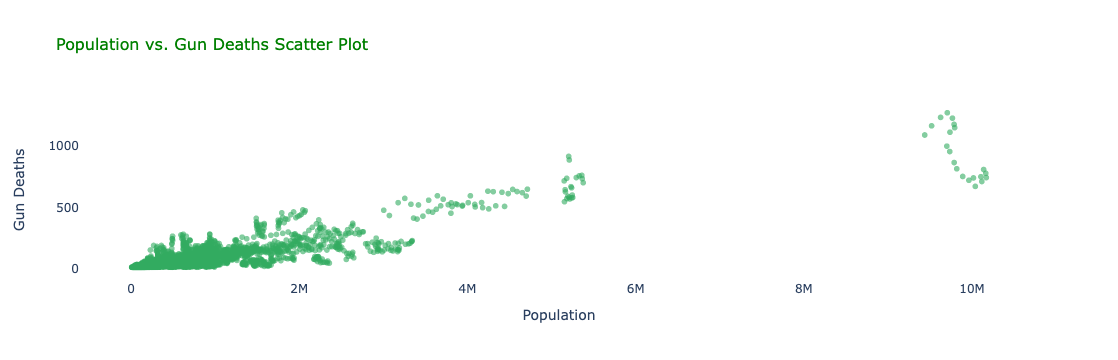

In [7]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact

# Load the data
data_path = './gun_deaths_us_1999_2019.csv'
df = pd.read_csv(data_path)

# Function to plot the interactive scatter plot for Population vs. Gun Deaths
def plot_scatter_kde():
    fig = px.scatter(df, x='Population', y='Deaths', title='Population vs. Gun Deaths Scatter Plot')
    fig.update_traces(marker=dict(color='rgba(50, 171, 96, 0.6)'), selector=dict(mode='markers'))
    fig.update_layout(
        title_font=dict(size=16, color='green'),
        xaxis_title='Population',
        yaxis_title='Gun Deaths',
        plot_bgcolor='white'
    )
    fig.update_traces(histnorm='probability', selector=dict(type='histogram'))
    fig.show()

# Display interactive plot with widget
plot_scatter_kde()



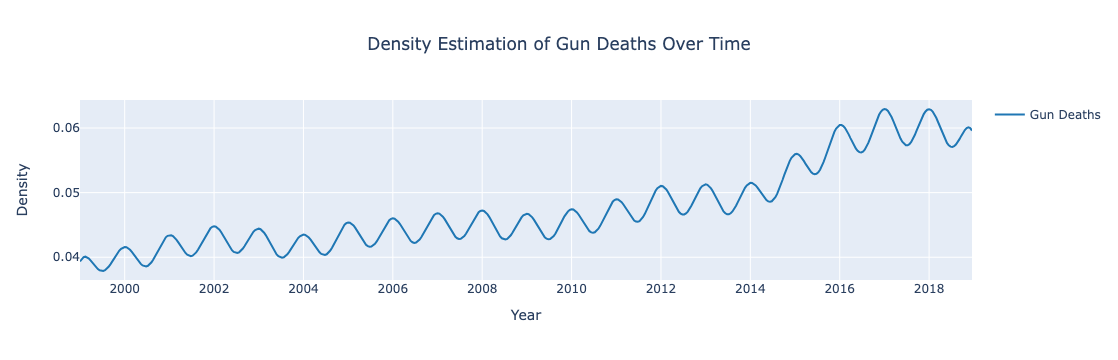

In [15]:
import pandas as pd
import plotly.figure_factory as ff
import numpy as np

# Load the c
file_path = './gun_deaths_us_1999_2019.csv'


data = pd.read_csv(file_path)

# Ensure the 'Year' and 'Deaths' columns are in the correct format
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Deaths'] = pd.to_numeric(data['Deaths'], errors='coerce')

# Drop rows with NaN values which might be causing issues
data.dropna(subset=['Year', 'Deaths'], inplace=True)

# Prepare the data for KDE plot
year_data = np.repeat(data['Year'].values, data['Deaths'].astype(int))

# Create the KDE plot using Plotly
fig = ff.create_distplot([year_data], ['Gun Deaths'], show_hist=False, show_rug=False)
fig.update_layout(title_text='Density Estimation of Gun Deaths Over Time', title_x=0.5, 
                  xaxis_title='Year', yaxis_title='Density')

# Display the plot
fig.show()



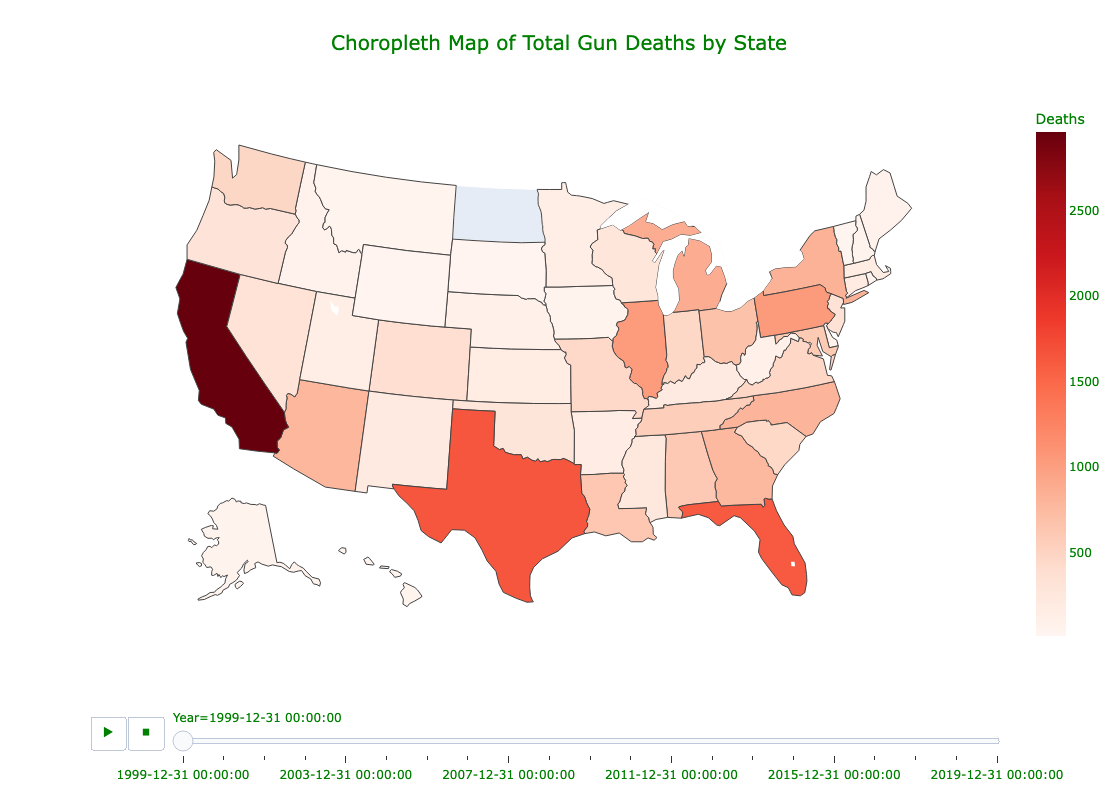

In [19]:
import pandas as pd
import plotly.express as px

# Load your dataset
file_path = './gun_deaths_us_1999_2019.csv'
data = pd.read_csv(file_path)

# Ensure the data types are correct and drop NaN values
data['State'] = data['State'].astype(str)
data['Year'] = pd.to_datetime(data['Year'], format='%Y') # Convert 'Year' column to datetime format
data.dropna(subset=['State', 'Deaths', 'Year'], inplace=True)

# Aggregate the total gun deaths by state for each year
total_deaths_by_state_yearly = data.groupby(['State', pd.Grouper(key='Year', freq='Y')])['Deaths'].sum().reset_index()

# Create the choropleth map with animation
fig = px.choropleth(total_deaths_by_state_yearly, locations='State', locationmode='USA-states', color='Deaths',
                    scope="usa", 
                    color_continuous_scale="Reds",
                    title="Choropleth Map of Total Gun Deaths by State",
                    animation_frame='Year')

# Update layout to make the map larger
fig.update_layout(title=dict(font=dict(color="green", size=20), x=0.5),
                  font=dict(color="green"),
                  geo=dict(bgcolor='rgba(0,0,0,0)', lakecolor='rgb(255, 255, 255)'),
                  width=1200,  # Increase the width
                  height=800   # Increase the height
                 )

# Show the plot
fig.show()




